# Vente des produits à l'année


## Contexte

Suite à la rencontre du 12 novembre 2020, nous avons affiché les catégories les plus
vendus mais le service merkting a besoin des produits les plus vendus et leur évolution.
Ainsi si possible une application qui affiche le produit le plus vendu selon une date.


## Visualisation des données

In [2]:
import pandas as pd
import yaml
import seaborn as sns
import matplotlib.pyplot as plt

with open('../params/configs/data_path.yaml', 'r') as fp:
	data_path = yaml.load(fp)
df_oder_item = pd.read_csv(data_path['olist_order_items_dataset'])
df_product = pd.read_csv(data_path['olist_products_dataset'])
df_orders = pd.read_csv(data_path['olist_orders_dataset'])
translation = pd.read_csv(data_path['product_category_name_translation'])
df = pd.merge(df_product, df_oder_item, on='product_id')
df = pd.merge(df, df_orders, on='order_id')
df = pd.merge(df, translation, on='product_category_name')
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], errors='coerce')
df['order_approved_at_ym'] = df['order_approved_at'].dt.to_period('M')
df['order_approved_at_ym'] = df['order_approved_at'].dt.to_period('M')
df['order_approved_at_ymd'] = df['order_approved_at'].dt.to_period('d')
df.sort_values(by="order_approved_at_ym", inplace=True)
df.sort_values(by="order_approved_at_ymd", inplace=True)

C:\Users\Verner\miniconda3\envs\tp\lib\site-packages\ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


Les 10 articles les plus vendus :

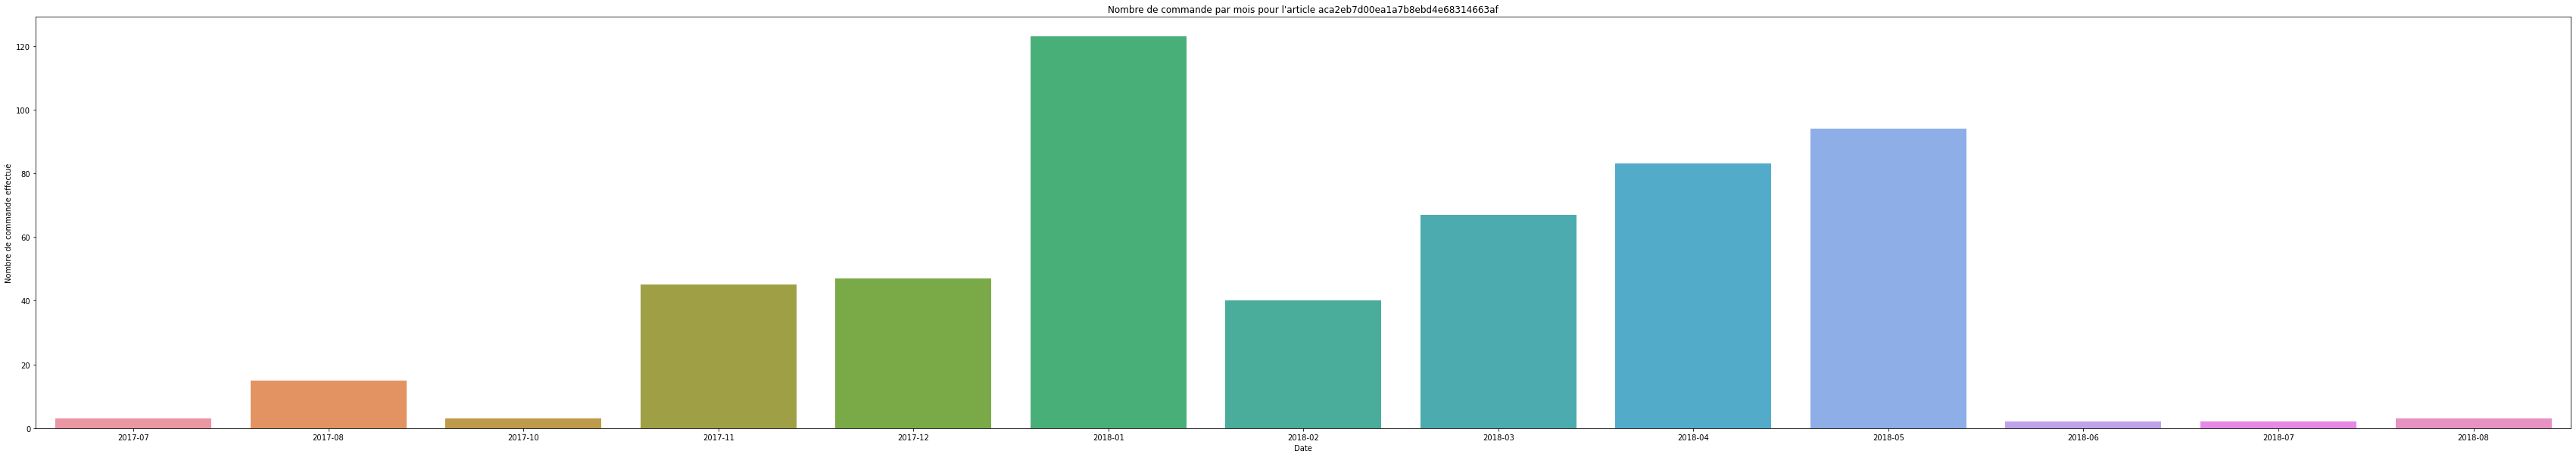

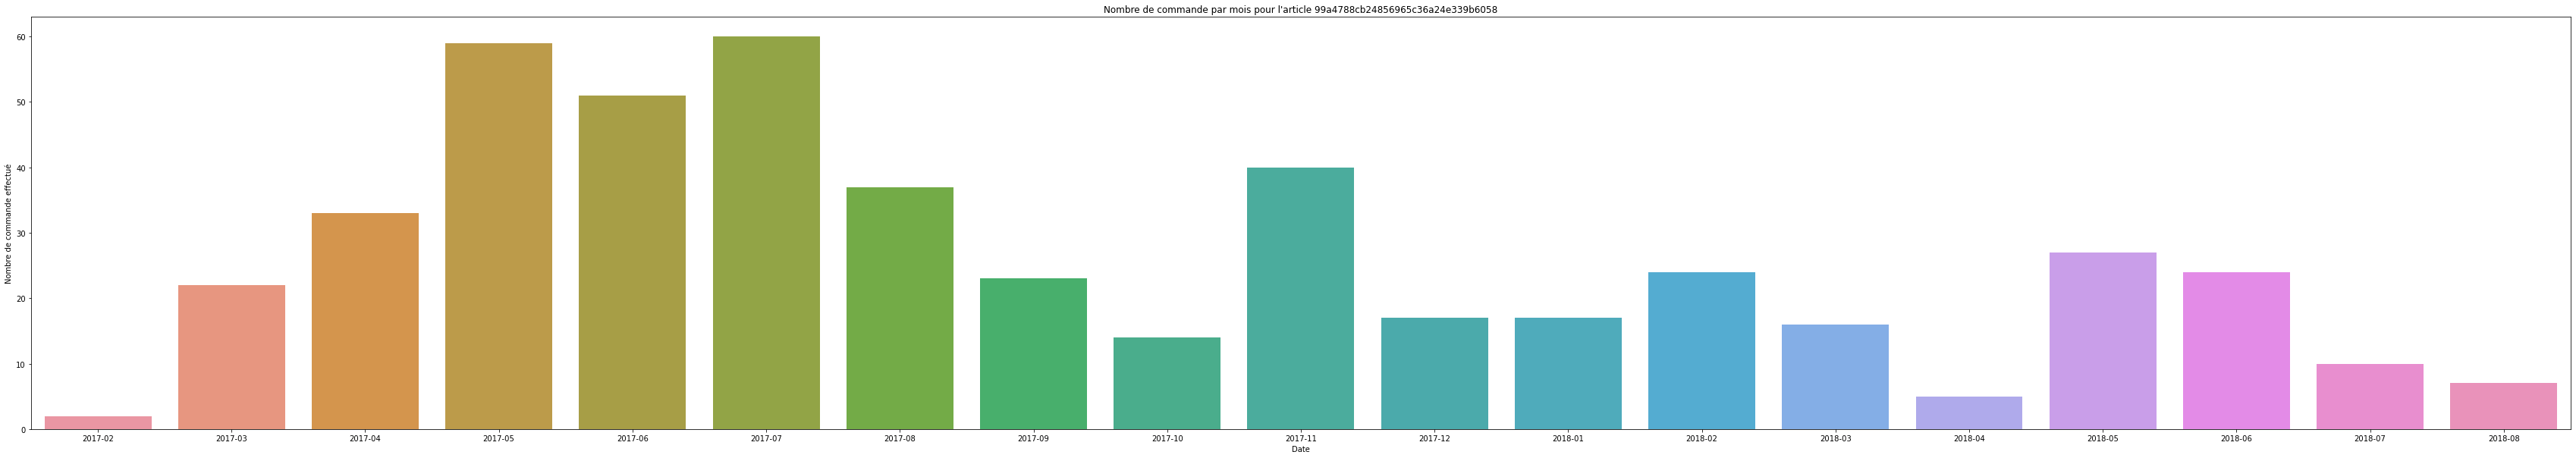

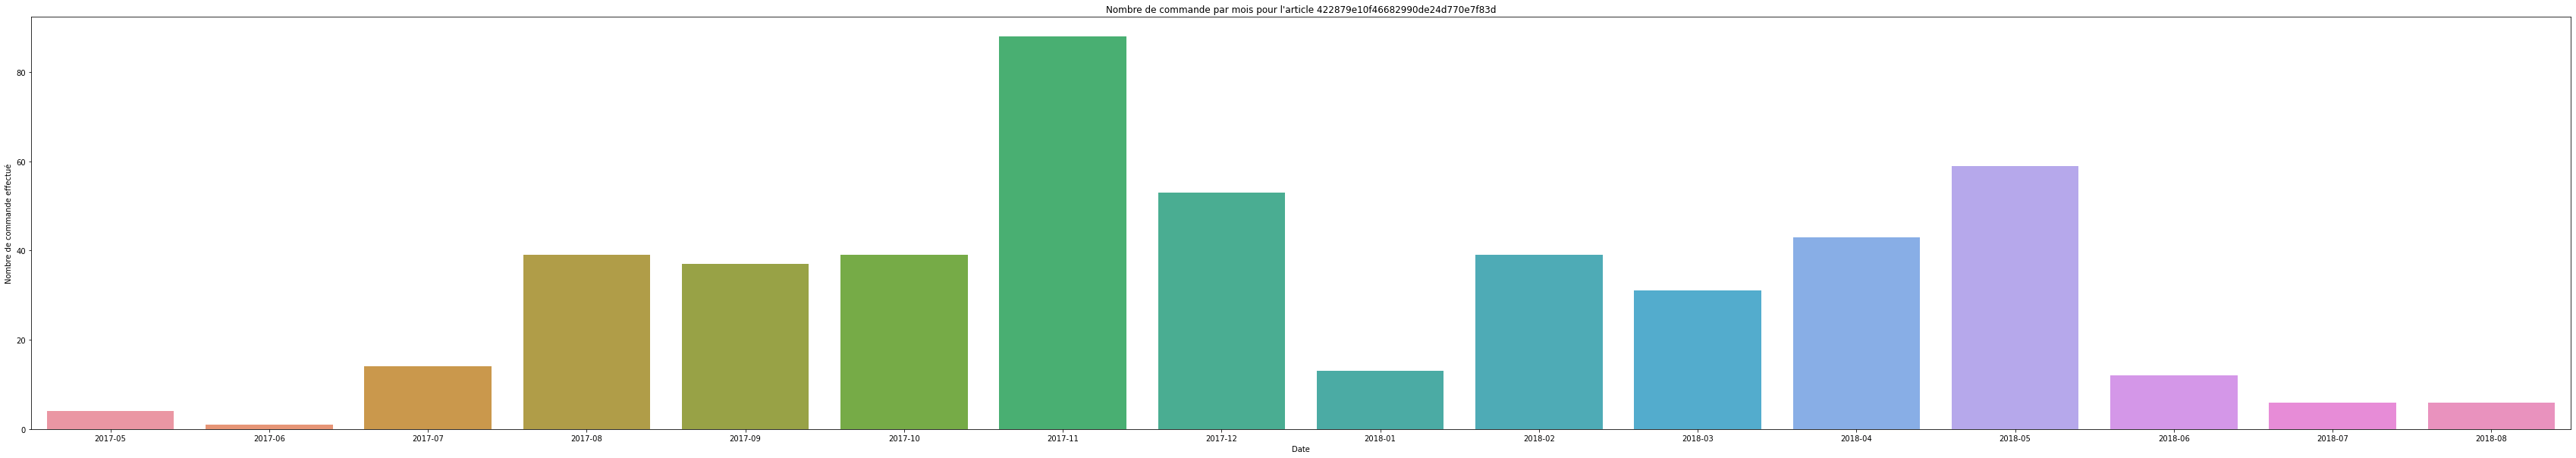

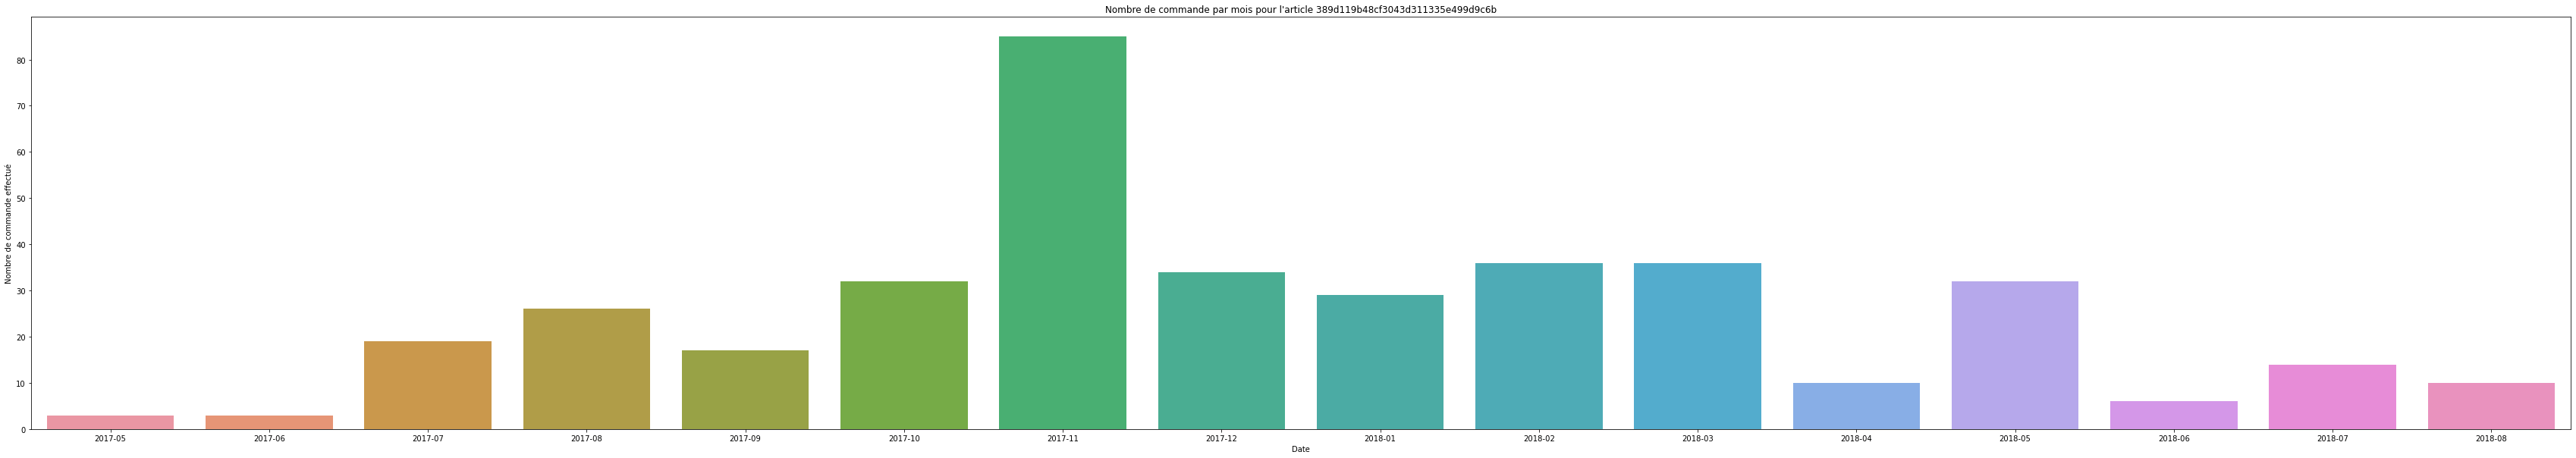

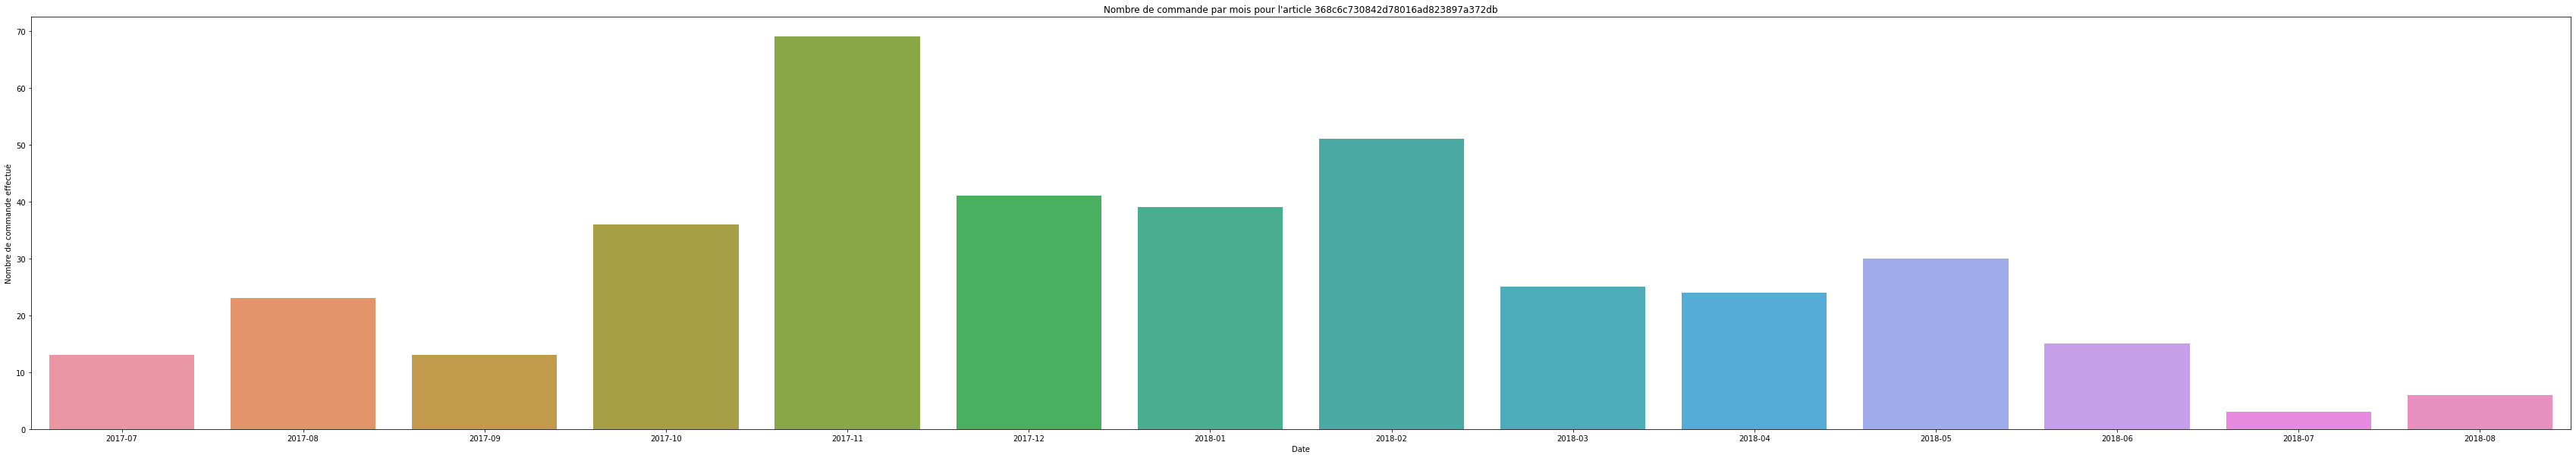

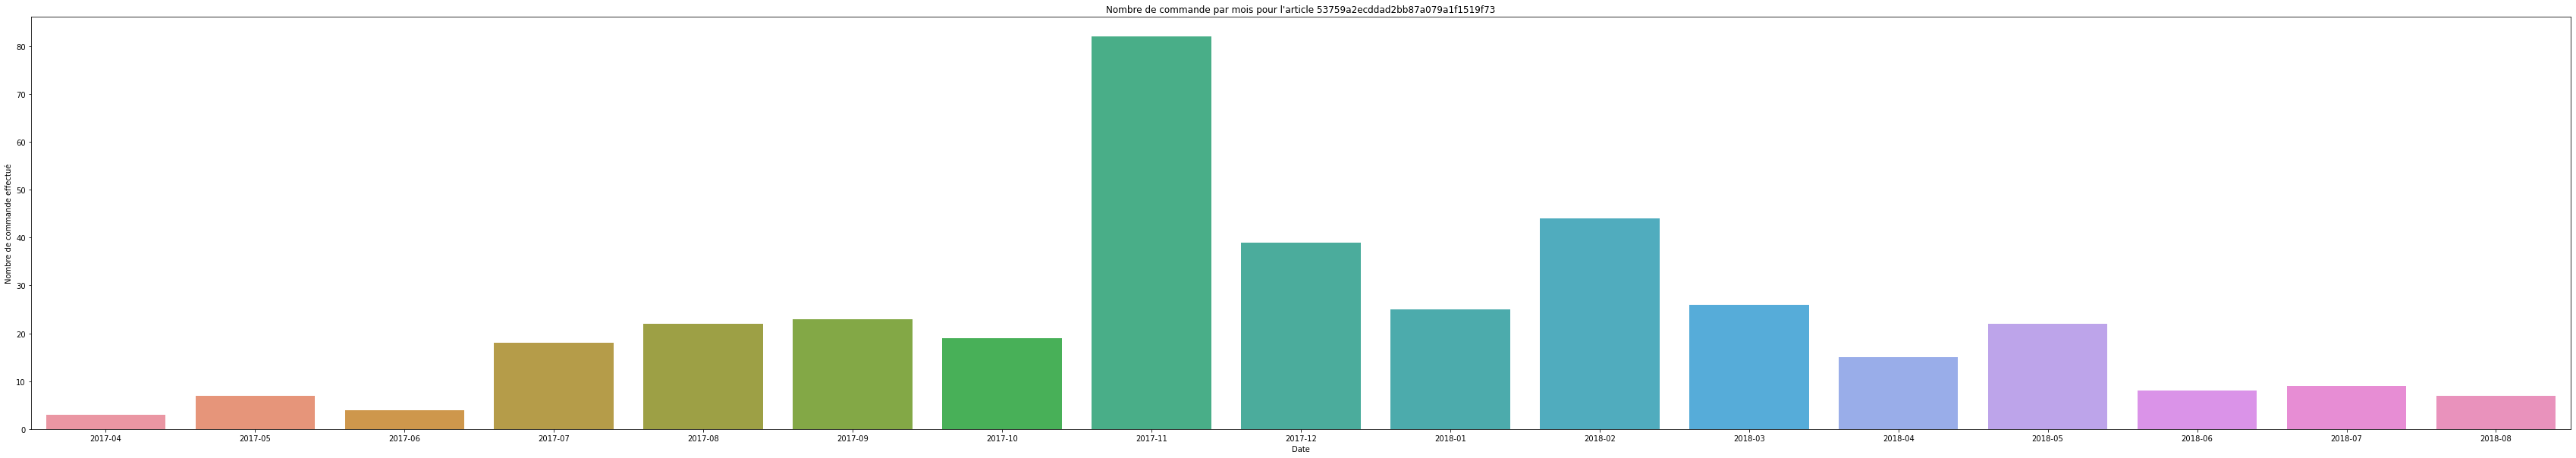

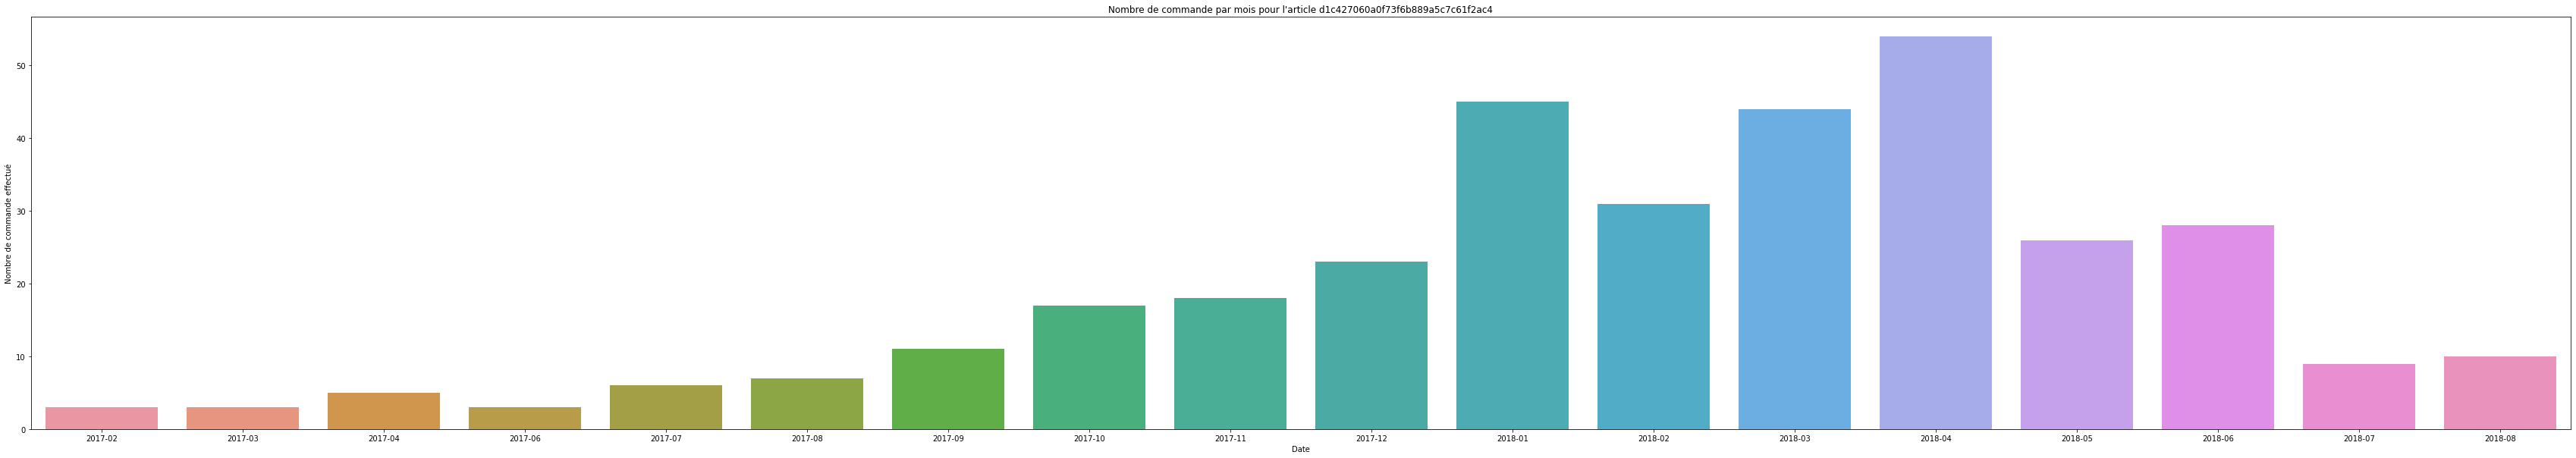

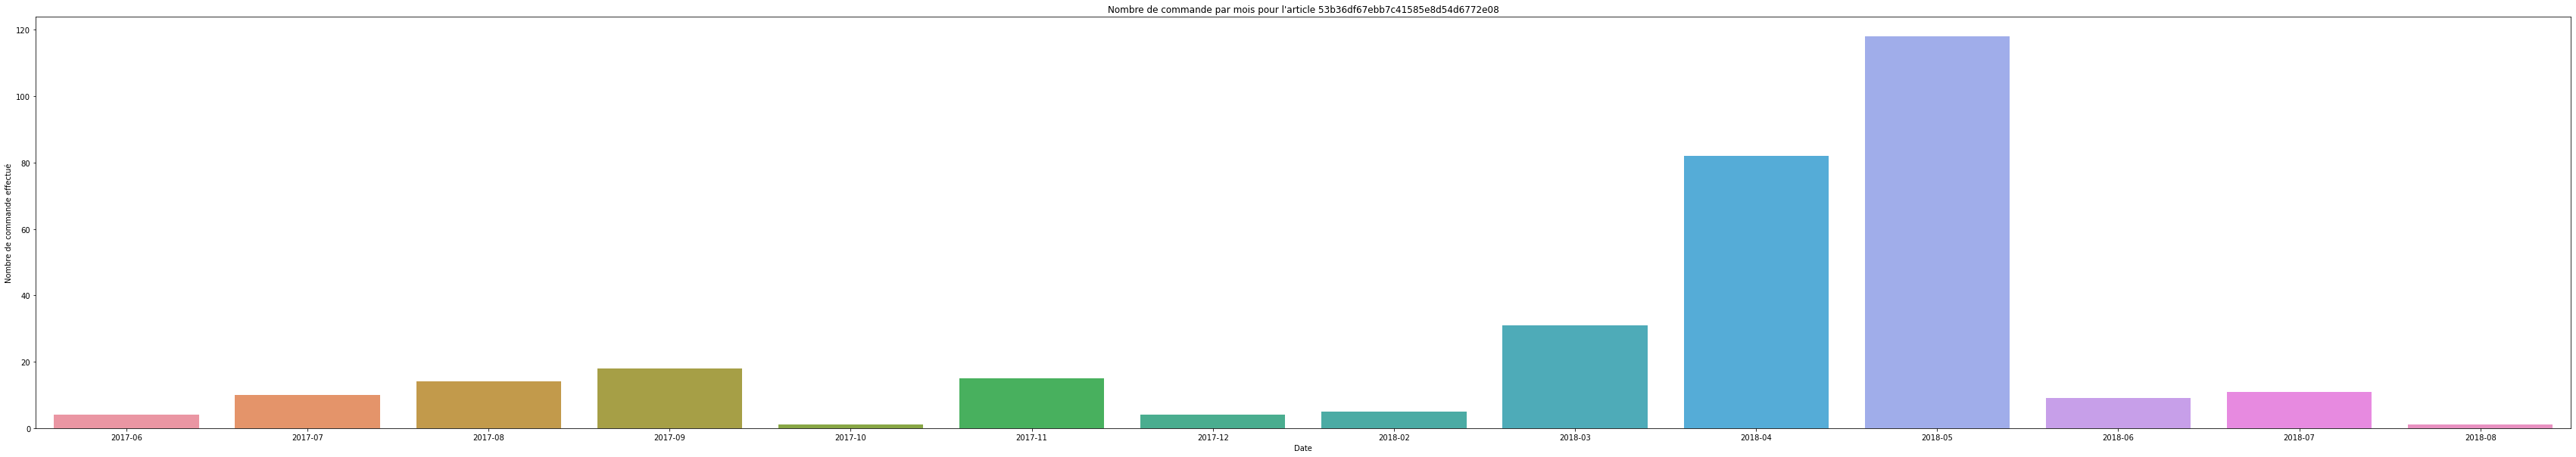

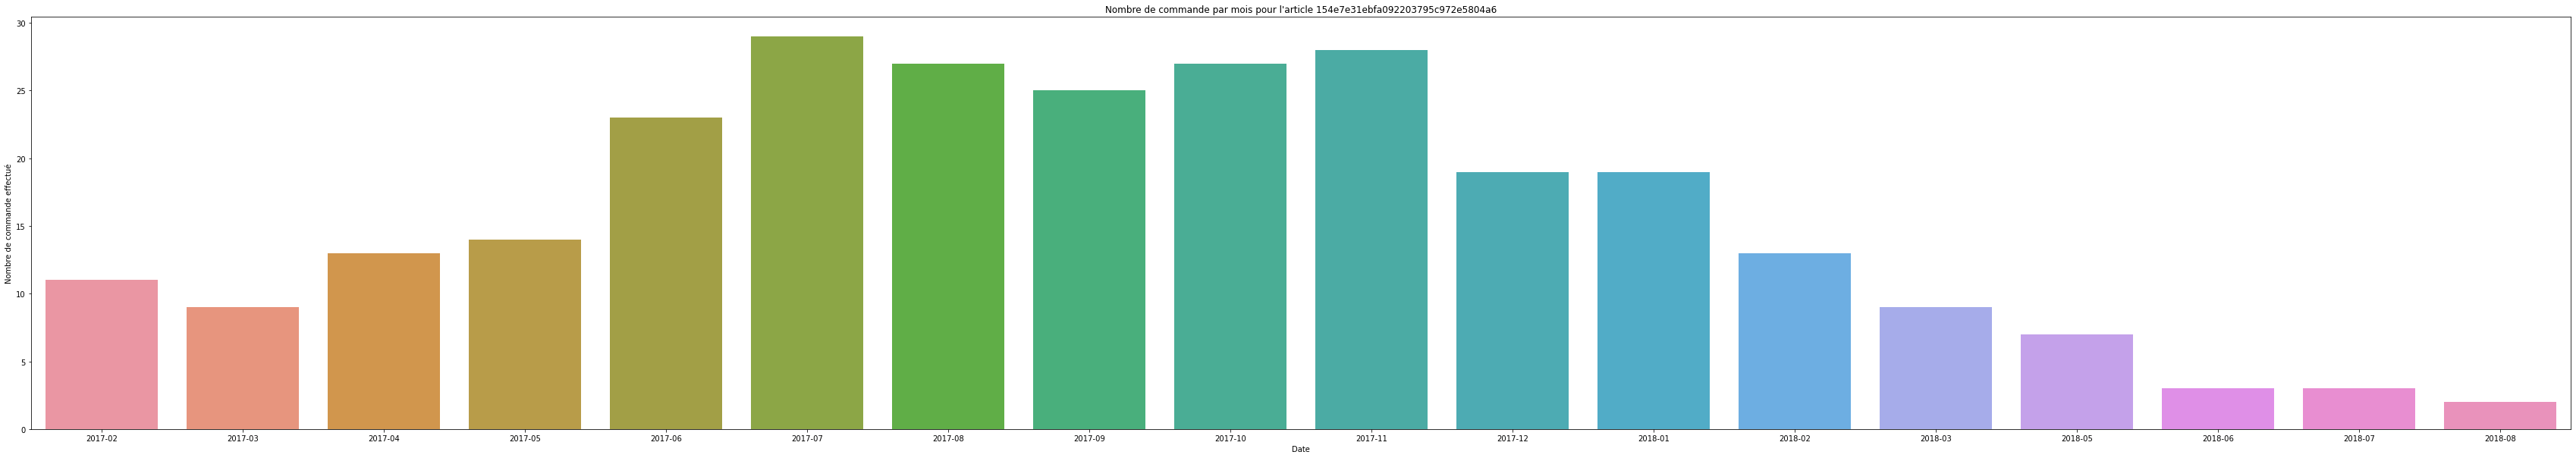

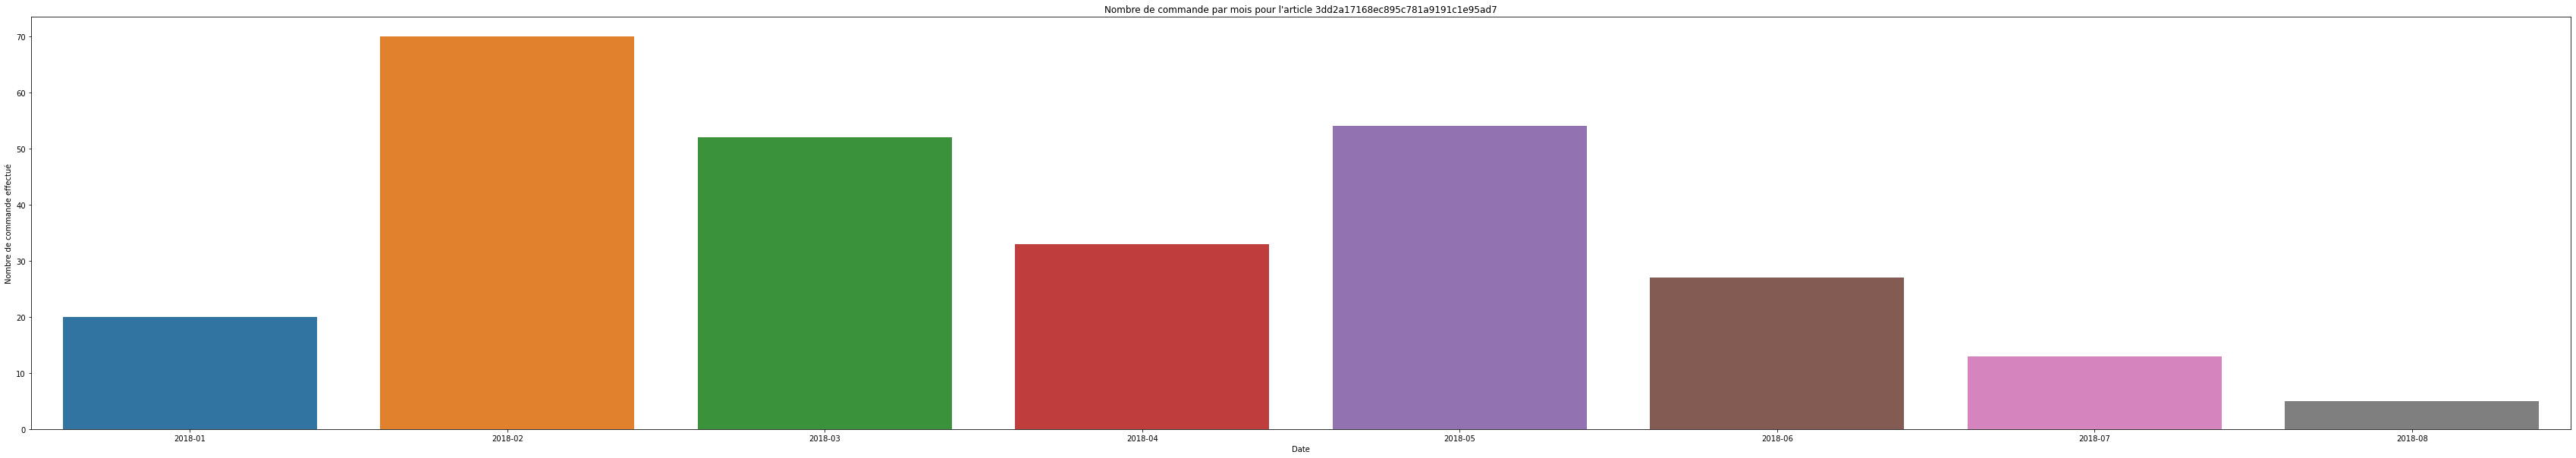

In [3]:
category_count = df['product_id'].value_counts()
category_list = category_count[category_count>273].index.tolist()
for i in category_list:
    df_tmp = df[df['product_id']==i]
    plt.figure(figsize=(60,10))
    sns.countplot(data=df_tmp, x='order_approved_at_ym')
    plt.ylabel("Nombre de commande effectué")
    plt.xlabel("Date")
    plt.title("Nombre de commande par mois pour l'article %s" % i)
    plt.show()

Le service marketing peut interpréter et utiliser ces graphiques.

### Les produits les plus vendus pour une période de temps choisi

Le client a proposé une application qui pourrait aider le service marketing.
Une application qui affiche les produits les plus vendus sur une période de temps choisis.

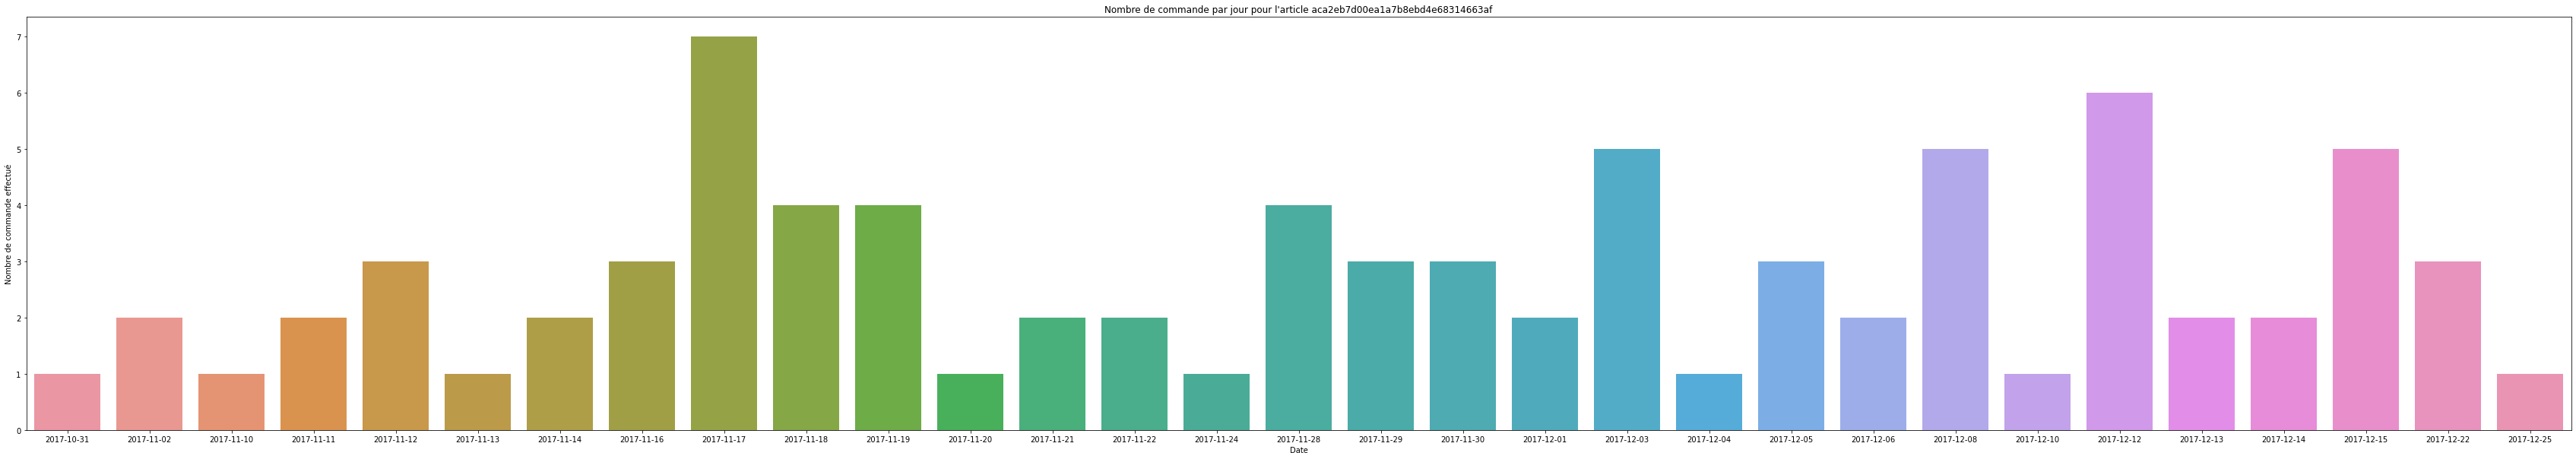

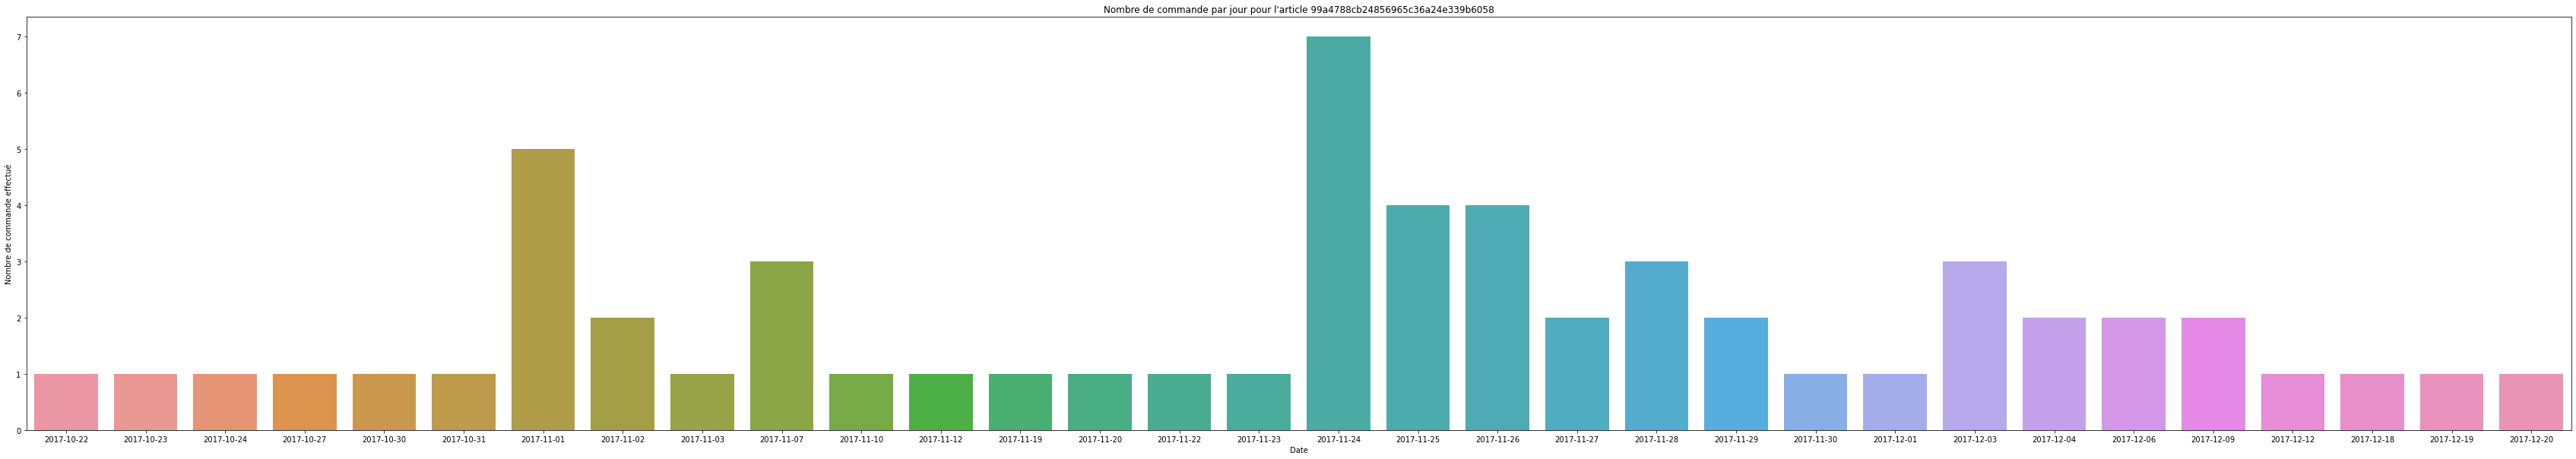

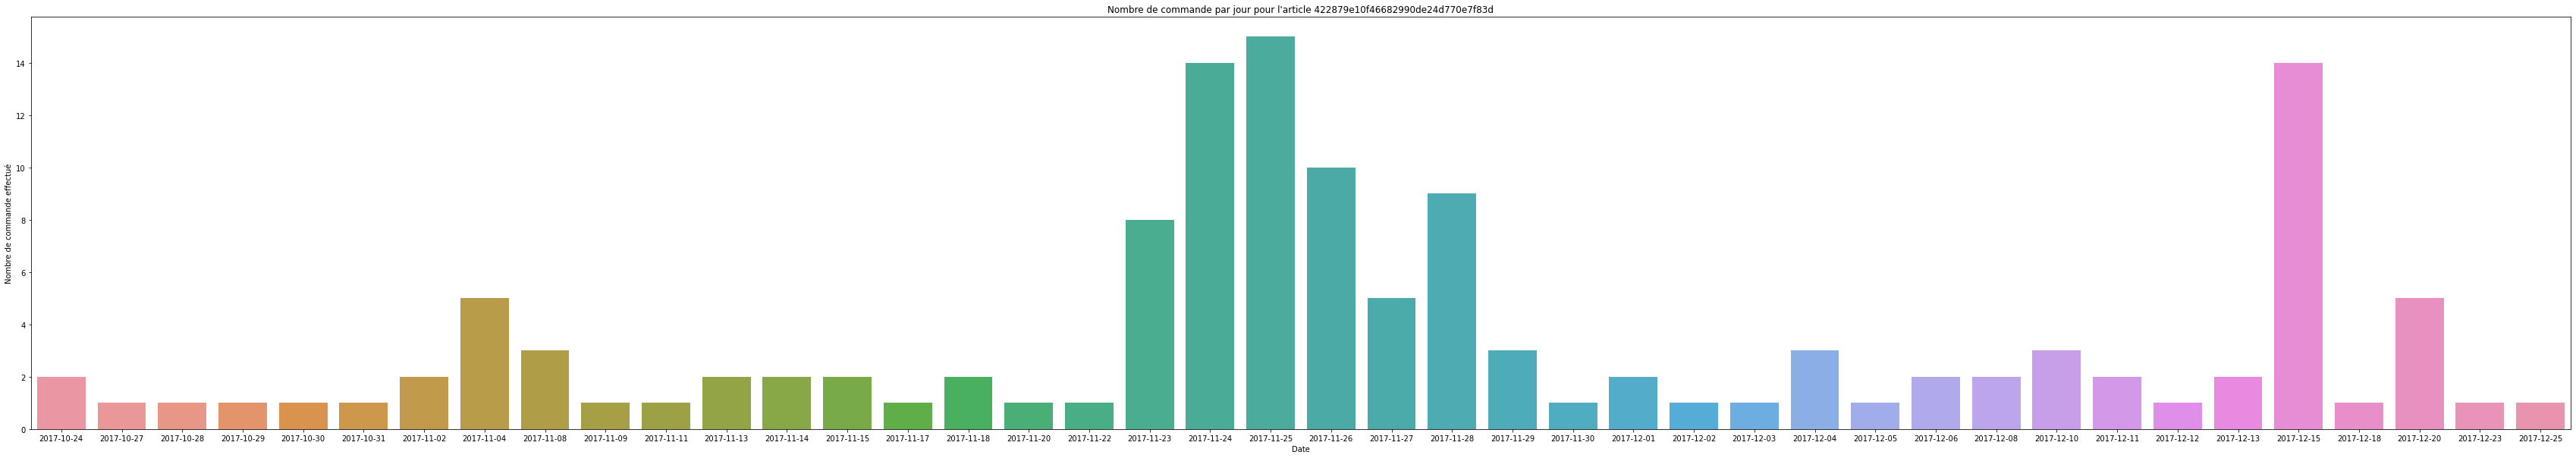

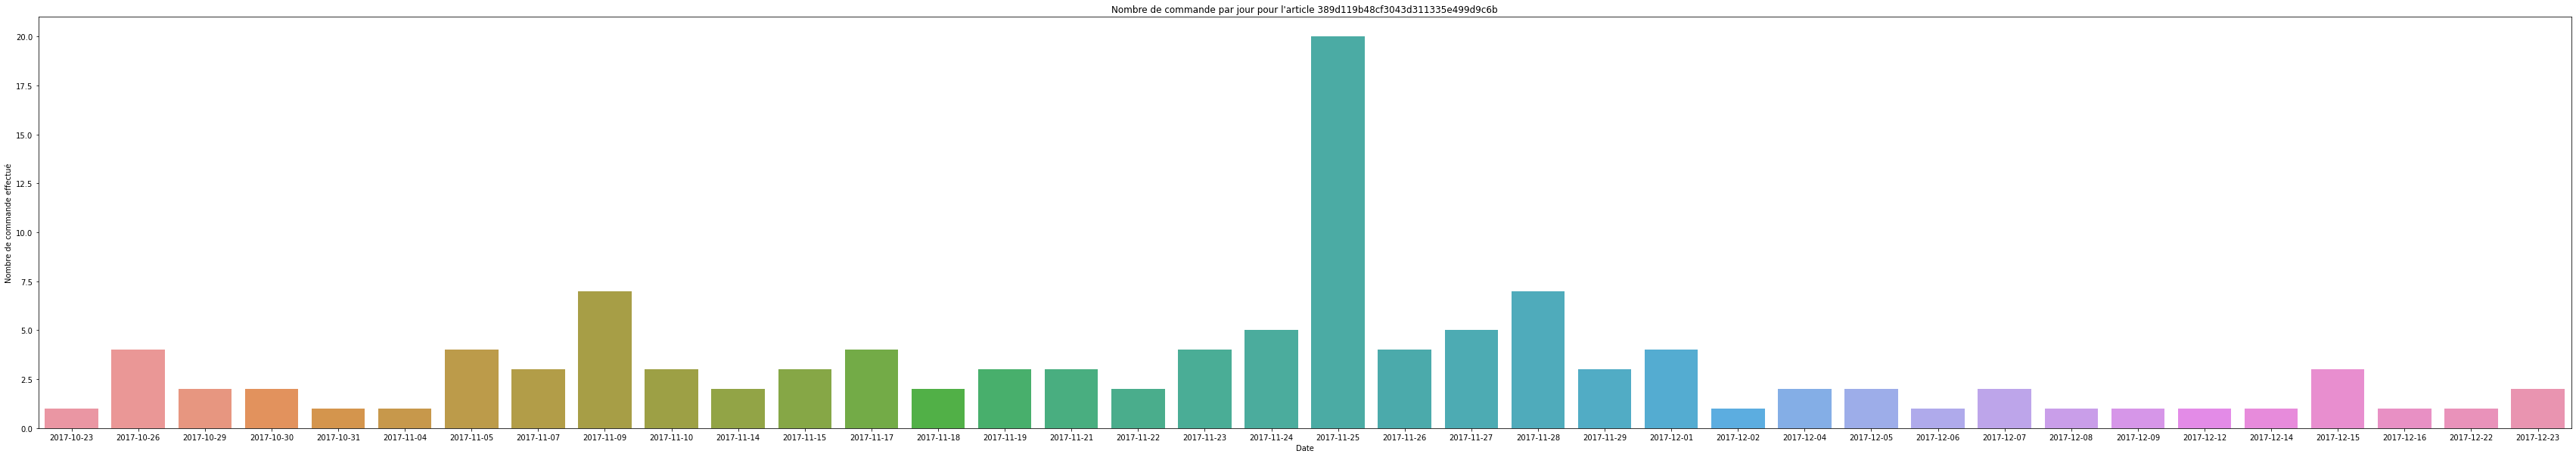

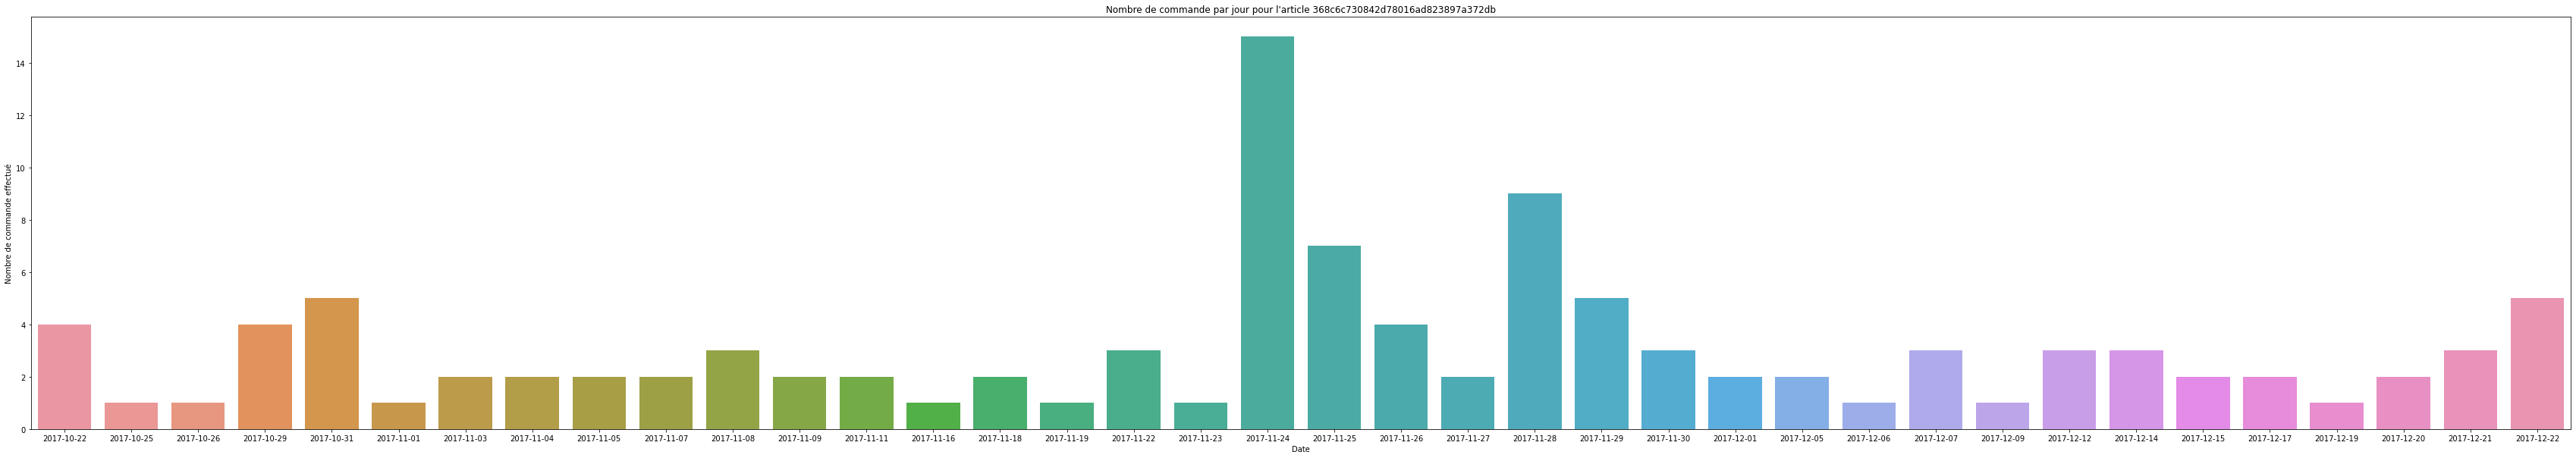

In [4]:
def top_product_by_time_interval(start_date, end_date, number_articles):
    df_tmp = df[df.order_approved_at_ymd.between(start_date, end_date)]
    category_count = df['product_id'].value_counts()[:number_articles]
    category_list = category_count.index.tolist()
    for i in category_list:
        try:
            plt.figure(figsize=(60,10))
            sns.countplot(data=df_tmp[df_tmp['product_id']==i], x='order_approved_at_ymd')
            plt.ylabel("Nombre de commande effectué")
            plt.xlabel("Date")
            plt.title("Nombre de commande par jour pour l'article %s" % i)
            plt.show()
        except:
            print()
    return None

top_product_by_time_interval('2017-10-22 00:00:00', '2017-12-25 00:00:00', 5)

Ici par exemple, on souhaite savoir les 5 articles les plus vendu entre le 22
octobre et le 25 décembre 2017 et voir leur évolution en fonction du temps.
Ceci permetterait au service marketing de visualiser très rapidement si
des articles sont récurents lors de certaines périodes.

### Visualiser l'évolution d'un produit spécifique

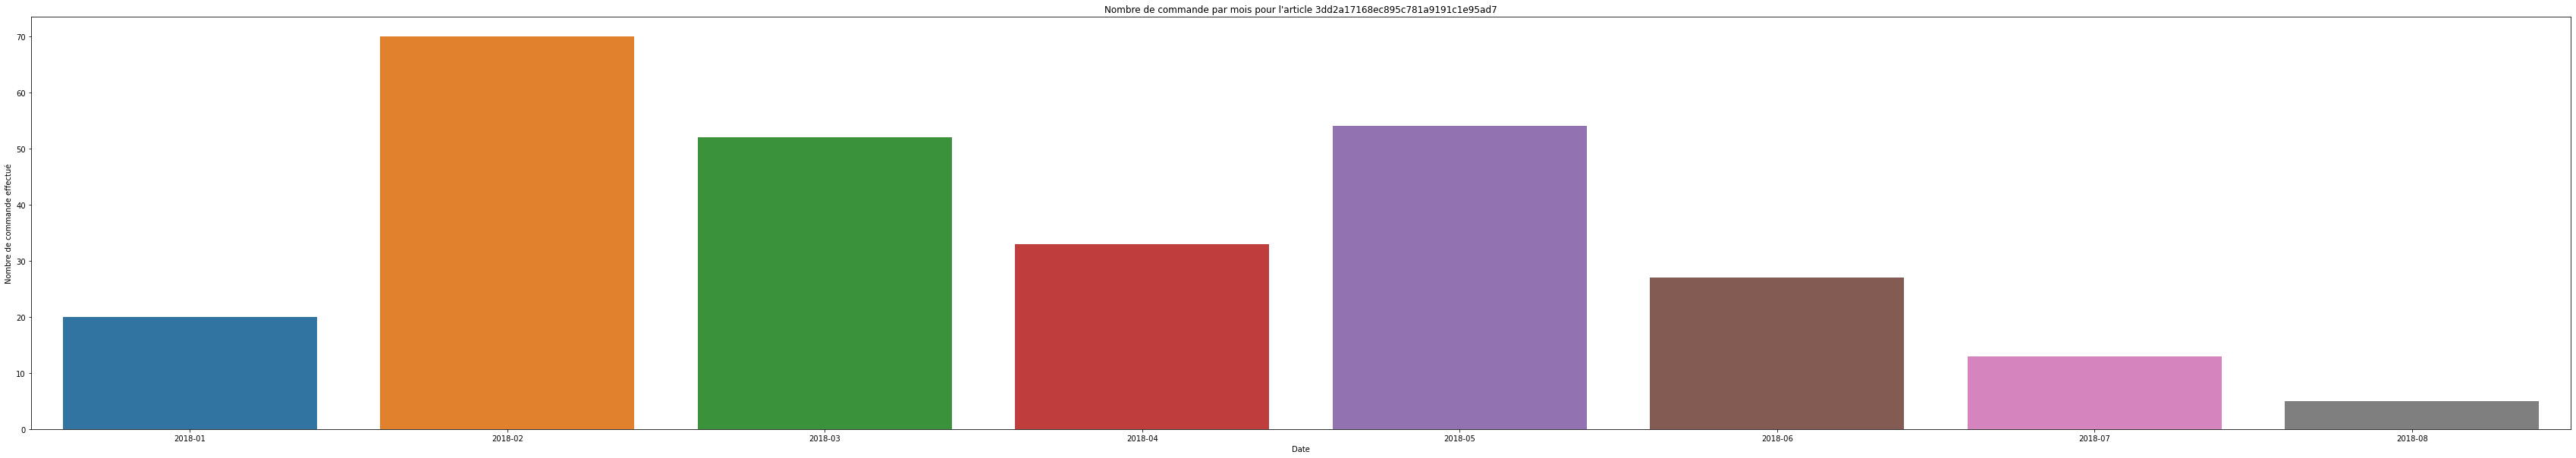

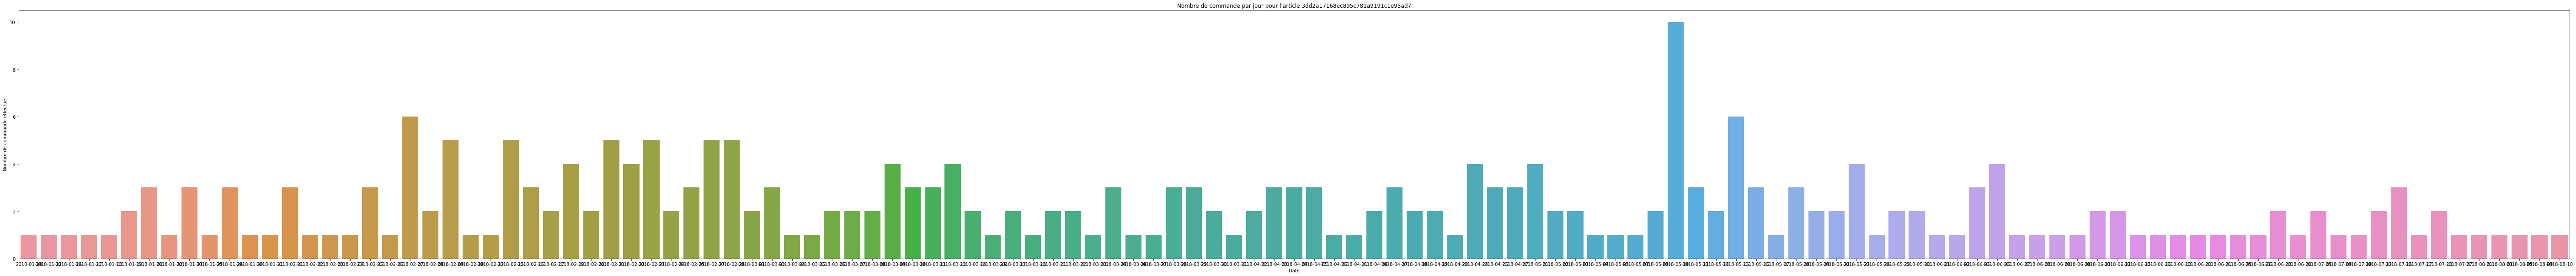

In [5]:
def plot_product_id(product_id):
    df_tmp = df[df['product_id']==i]
    try:
        plt.figure(figsize=(60,10))
        sns.countplot(data=df_tmp, x='order_approved_at_ym')
        plt.ylabel("Nombre de commande effectué")
        plt.xlabel("Date")
        plt.title("Nombre de commande par mois pour l'article %s" % i)
        plt.show()
        plt.figure(figsize=(100,10))
        sns.countplot(data=df_tmp, x='order_approved_at_ymd')
        plt.ylabel("Nombre de commande effectué")
        plt.xlabel("Date")
        plt.title("Nombre de commande par jour pour l'article %s" % i)
        plt.show()
    except:
        print()
    return None
plot_product_id('53b36df67ebb7c41585e8d54d6772e08')

Il y a l'affichage par mois ainsi que par jour pour voir l'évolution d'un article.
Cela peut être très pratique pour repérer des saisonarité pour le service marketing
ainsi que le service qui s'occupe des stocks.

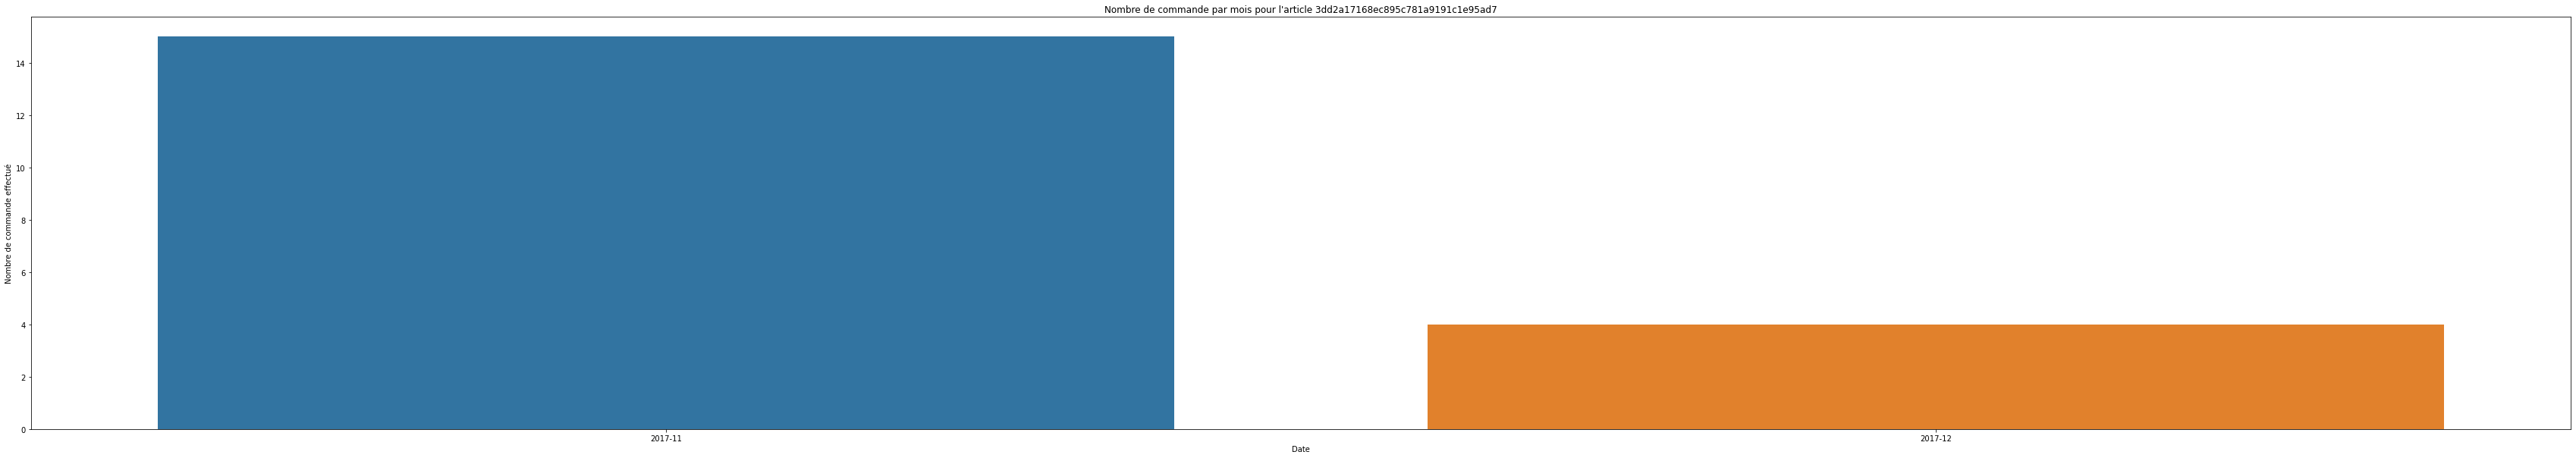

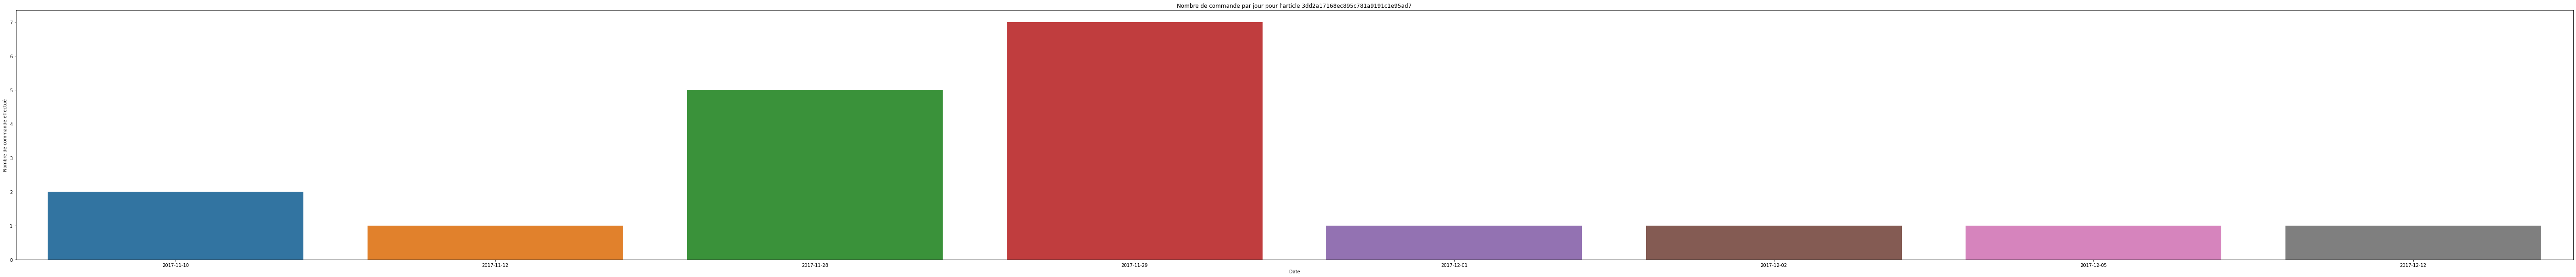

In [8]:
def plot_product_id_with_tiem_interval(product_id, start_date, end_date):
    df_tmp = df[df.order_approved_at_ymd.between(start_date, end_date)]
    df_tmp = df_tmp[df_tmp['product_id']==product_id]
    try:
        plt.figure(figsize=(60,10))
        sns.countplot(data=df_tmp, x='order_approved_at_ym')
        plt.ylabel("Nombre de commande effectué")
        plt.xlabel("Date")
        plt.title("Nombre de commande par mois pour l'article %s" % i)
        plt.show()
        plt.figure(figsize=(100,10))
        sns.countplot(data=df_tmp, x='order_approved_at_ymd')
        plt.ylabel("Nombre de commande effectué")
        plt.xlabel("Date")
        plt.title("Nombre de commande par jour pour l'article %s" % i)
        plt.show()
    except:
        print()
    return None

plot_product_id_with_tiem_interval('53b36df67ebb7c41585e8d54d6772e08', '2017-10-22 00:00:00', '2017-12-25 00:00:00')

Ici on voit l'évolution pour un produit donné pour une période de temps donnée


